# Keras

# Keras library
Keras is een Python library waarmee je neurale netwerken kan bouwen.

In [17]:
# We moeten op Datalore momenteel downgraden naar Keras 2.6
# Anders is er een conflict: AlreadyExistsError: Another metric with the same name already exists.
# !pip install keras == 2.6.*

## MNIST dataset laden
De MNIST dataset is heel bekende dataset waarin afbeeldingen van geschreven cijfers zitten.  De Keras Datasets library bevat deze dataset.

In [16]:
import keras.datasets
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Inspectie van de structuur van de gegevens

In [18]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### Plots maken van enkele afbeeldingen
Met behulp van matplotlib kunnen we enkele cijfers tonen.

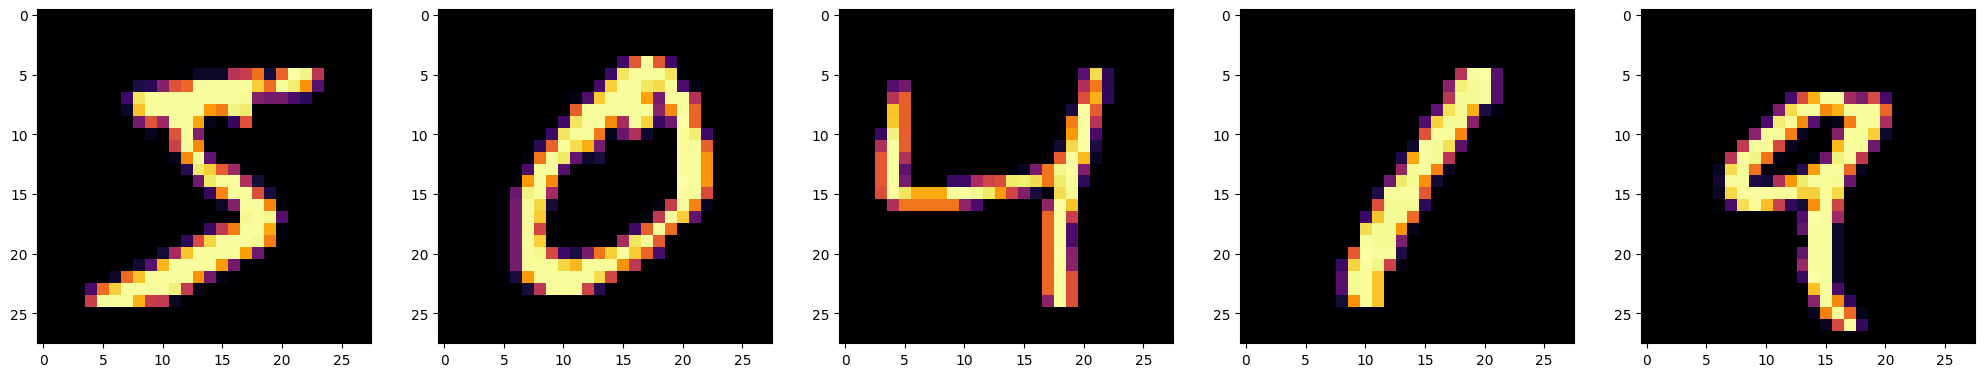

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    image = x_train[i].reshape(28, 28)
    axes[i].imshow(image, cmap='inferno')

### Input- en outputtransformaties
We moeten de trainingset omzetten naar een ander formaat. 

We hebben 60000 afbeelding van 28 bij 28 pixels, en gaan deze omzetten naar 60000 vectoren van lengte 784 (= 28 x 28). 

Voor elke afbeelding uit de trainingset kennen we ook het echte cijfer dat getoond wordt op die afbeelding, deze cijfers zitten in y_train. We moeten deze omzetten naar binaire (categorical) vorm.

In [20]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
y_train = to_categorical(y_train) # one-hot encoding

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [6]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Opbouwen van Keras Neuraal Netwerk

Model: "MNIST_Crusher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 58186 (227.29 KB)
Trainable params: 56618 (221.16 KB)
Non-trainable params: 1568 (6.12 KB)
______________

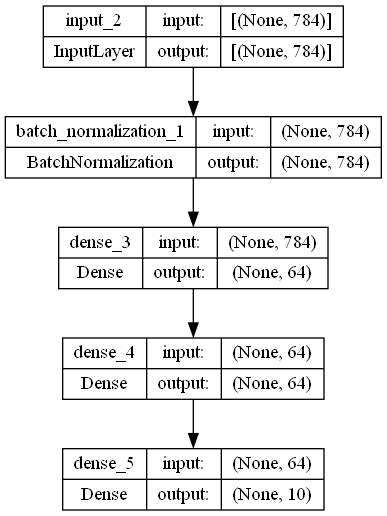

In [21]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.utils import plot_model

# functional API van keras, sequential mag ook
inputs = Input(shape=(x_train.shape[1],))
x = BatchNormalization()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs, name='MNIST_Crusher')
model.summary()
# onderstaande werkt niet op DataLore wegens geen installatie van GraphViz
plot_model(model, to_file='mnist_crusher.png', show_shapes=True)
# display(Image('mnist_crusher.png', width=400, height=400))

### Compilatie van het model

In [22]:
model.compile(
    loss=keras.losses.categorical_crossentropy,  # voor regressie moet je rmse gebruiken
    optimizer=tf.keras.optimizers.Adam(),    
    metrics=keras.metrics.categorical_accuracy
)

### Trainen van het model
*Nota: we gebruiken een extra lib `livelossplot` voor de visualisatie van de training. Deze moet dus geïnstalleerd worden binnen DataLore*

In [23]:
!pip install livelossplot

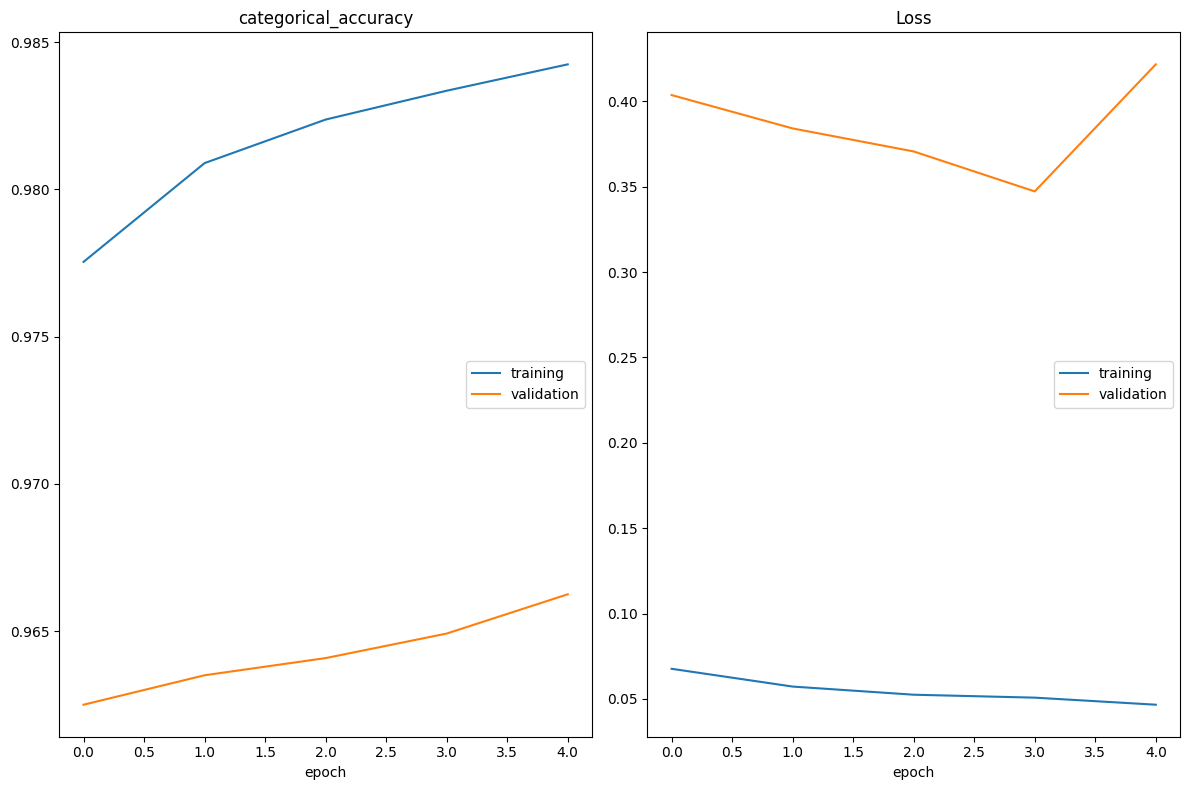

categorical_accuracy
	training         	 (min:    0.978, max:    0.984, cur:    0.984)
	validation       	 (min:    0.962, max:    0.966, cur:    0.966)
Loss
	training         	 (min:    0.047, max:    0.068, cur:    0.047)
	validation       	 (min:    0.347, max:    0.422, cur:    0.422)


In [28]:
from livelossplot import PlotLossesKeras

history = model.fit(
    x_train,  # training data
    y_train,  # training targets
    epochs=5, # aantal iteraties over de trainingset
    batch_size=32, # aantal afbeeldingen per iteratie
    validation_split=0.2, # percentage van de trainingset dat gebruikt wordt voor validatie
    verbose=False,
    callbacks=[PlotLossesKeras()]
)

## Testen van NN op testset

We gebruiken ongeziene cijferafbeeldingen uit de testset om te controleren hoe ons neuraal netwerk getraind is.

In [29]:
x_test = x_test.reshape(-1, 784)
y_test = to_categorical(y_test, num_classes=10)
model.evaluate(x_test, y_test)

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/cond/remove_squeezable_dimensions/cond/Squeeze defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\traitlets\config\application.py", line 1046, in launch_instance

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\deketelw\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\deketelw\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\deketelw\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\deketelw\AppData\Local\Temp\ipykernel_13556\3085657300.py", line 3, in <module>

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 1919, in test_step

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\losses.py", line 263, in call

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\utils\losses_utils.py", line 209, in squeeze_or_expand_dimensions

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\utils\losses_utils.py", line 204, in <lambda>

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\utils\losses_utils.py", line 155, in remove_squeezable_dimensions

  File "C:\Users\deketelw\.virtualenvs\data-science-flex\Lib\site-packages\keras\src\utils\losses_utils.py", line 157, in <lambda>

Detected at node cond/remove_squeezable_dimensions/cond/Squeeze defined at (most recent call last):
<stack traces unavailable>
Can not squeeze dim[2], expected a dimension of 1, got 10
	 [[{{node categorical_crossentropy/cond/remove_squeezable_dimensions/cond/Squeeze}}, {{node cond/remove_squeezable_dimensions/cond/Squeeze}}]] [Op:__inference_test_function_874571]

We voorspellen de eerste 5 afbeeldingen uit de testset en controleren op de juistheid.

1/1 [==============================] - 0s 71ms/step
[7 2 1 0 4]
[7 2 1 0 4]


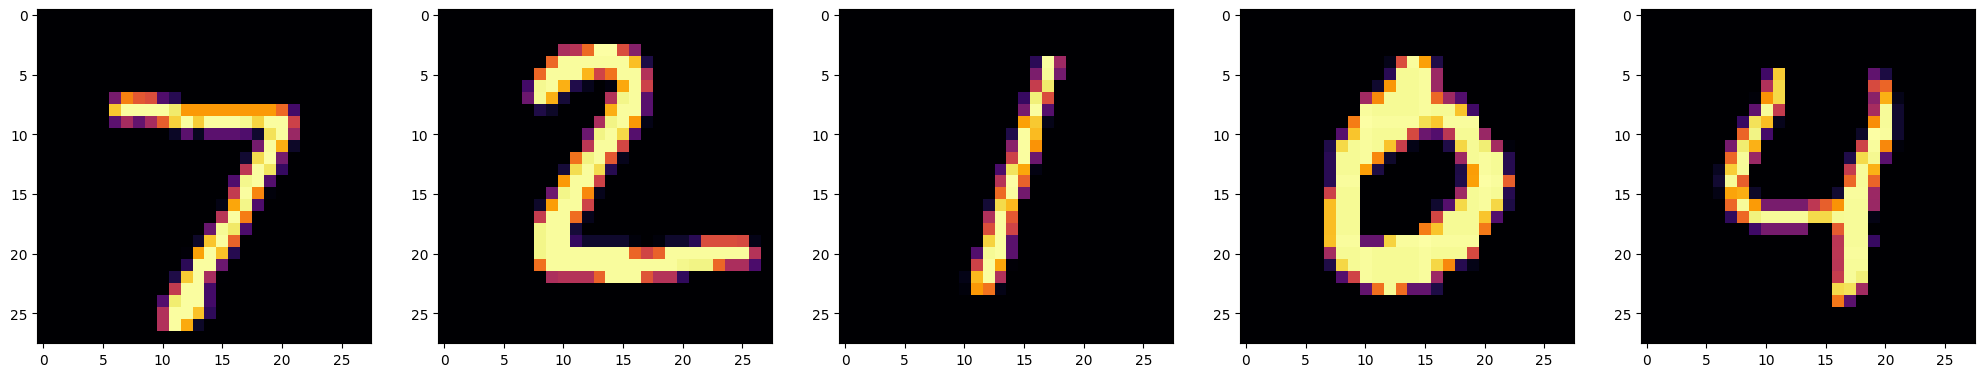

In [25]:
import numpy as np

print(np.argmax(model.predict(x_test[:5]), axis=1))
print(np.argmax(y_test[:5], axis=1))
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    image = x_test[i].reshape(28, 28)
    axes[i].imshow(image, cmap='inferno')

## Model opslaan en laden

We kunnen het model opslaan in een bestand en later terug inladen.

In [26]:
model.save('mnist_crusher.keras')

In [27]:
model = keras.models.load_model('mnist_crusher.keras')